MATPLOTLIB VISUALIZATION USING GRADIO

In [1]:
import pandas as pd
# simple data
data = {
    'Month': ['jan','Feb','Mar','Apr','May','Jun'],
    'Sales' : [10000,12000,15000,13000,17000,16000],
    'Profit': [2000,3000,4000,2500,3500,3000]
}
df = pd.DataFrame(data)

In [2]:
df

,Month,Sales,Profit
0,jan,10000,2000
1,Feb,12000,3000
2,Mar,15000,4000
3,Apr,13000,2500
4,May,17000,3500
5,Jun,16000,3000


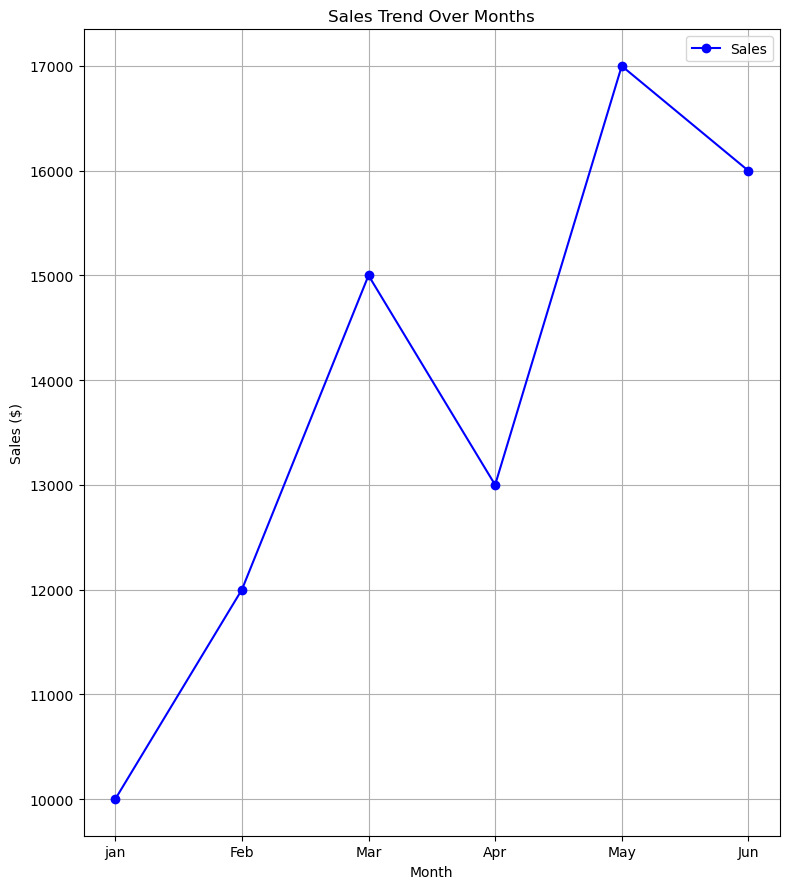

In [3]:
# line plot sales over time
import matplotlib.pyplot as plt
# Line plot :Sale over Time
plt.figure(figsize=(8,9))
plt.plot(df['Month'],df['Sales'],color = 'blue', marker = 'o', linestyle = '-',label = 'Sales')
plt.title('Sales Trend Over Months')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
# output : Aline plot showing the sales trend over  the month

####lt.figure(figsize=(8,9)): This line creates a new figure (the canvas where the plot will be drawn). The figsize=(8,9) argument sets the dimensions of the figure to be 8 inches wide and 9 inches tall.
####plt.legend(): This displays the legend on the plot. The legend shows the label defined in plt.plot() ('Sales'), helping viewers understand what the line represents.
####plt.tight_layout(): This automatically adjusts the plot's parameters to provide a tight layout, preventing labels and titles from overlapping or being cut off.






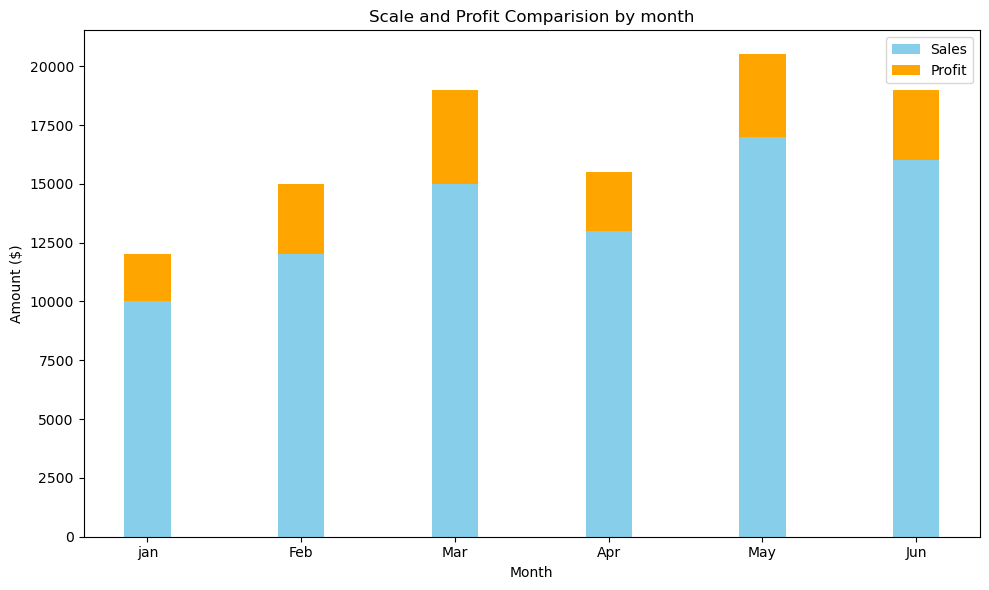

In [4]:
# Bar Plot Sales  vs Profit by month
plt.figure(figsize = (10,6))
width = 0.3 # This represent the width of the bar
plt.bar(df['Month'],df['Sales'],width =width,label='Sales',color = 'skyblue')
plt.bar(df['Month'],df['Profit'],width=width,label = 'Profit',color = 'orange',bottom = df['Sales'])
plt.title('Scale and Profit Comparision by month')
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.legend()
plt.tight_layout()
plt.show()
# A stack bar plot where you can compair sales and profit for each month

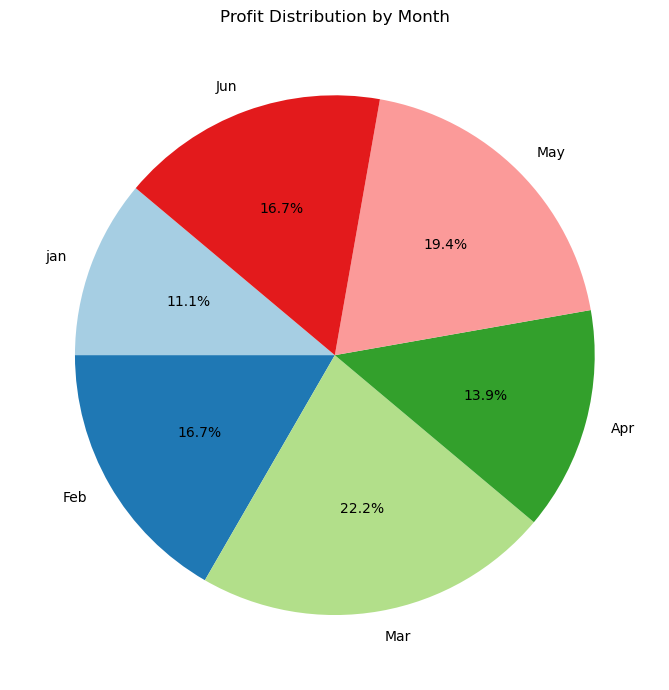

In [5]:
#pie Chart :profit distribution by month
plt.figure(figsize=(7,7))
plt.pie(df['Profit'], labels=df['Month'],autopct='%1.1f%%',startangle=140,colors=plt.cm.Paired.colors)
plt.title('Profit Distribution by Month')
plt.tight_layout()
plt.show()

colors=plt.cm.Paired.colors: This uses a built-in matplotlib colormap to automatically assign a distinct color to each pie slice from a predefined palette.

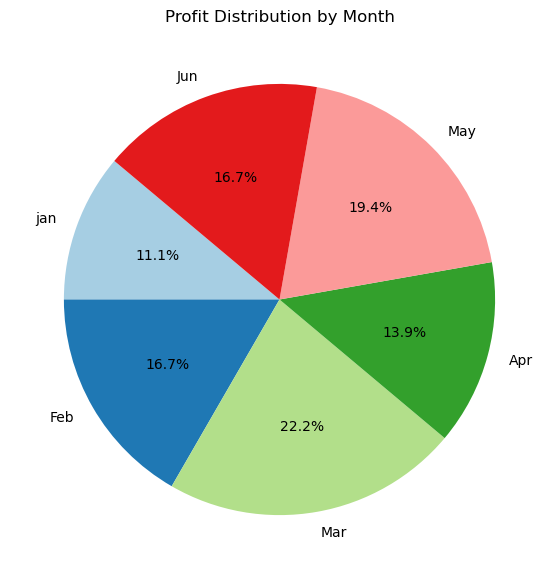

In [6]:
#pie Chart :profit distribution by month
plt.figure(figsize=(7,7))
plt.pie(df['Profit'], labels=df['Month'],autopct='%1.1f%%',startangle=140,colors=plt.cm.Paired.colors)
plt.title('Profit Distribution by Month')
#plt.tight_layout()
plt.show()

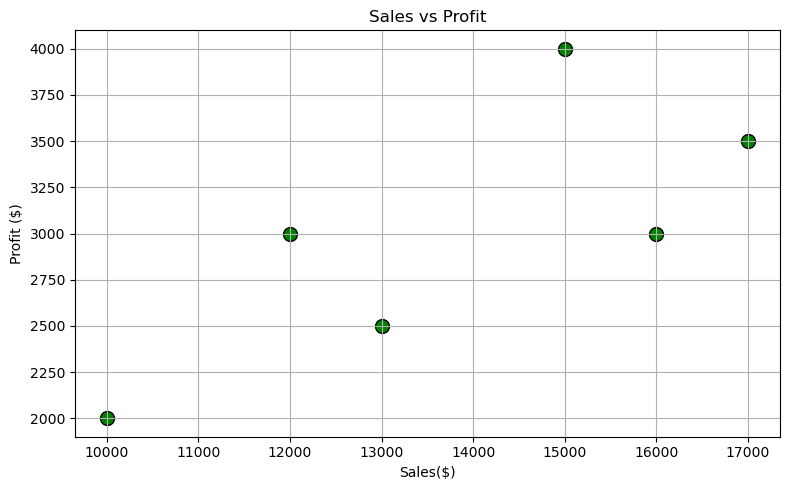

In [7]:
#scatter plot : Sales vs Profit(correlation)
plt.figure(figsize=(8,5))
plt.scatter(df['Sales'],df['Profit'],color = 'green', s = 100,edgecolors='black')
plt.title('Sales vs Profit')
plt.xlabel('Sales($)')
plt.ylabel('Profit ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

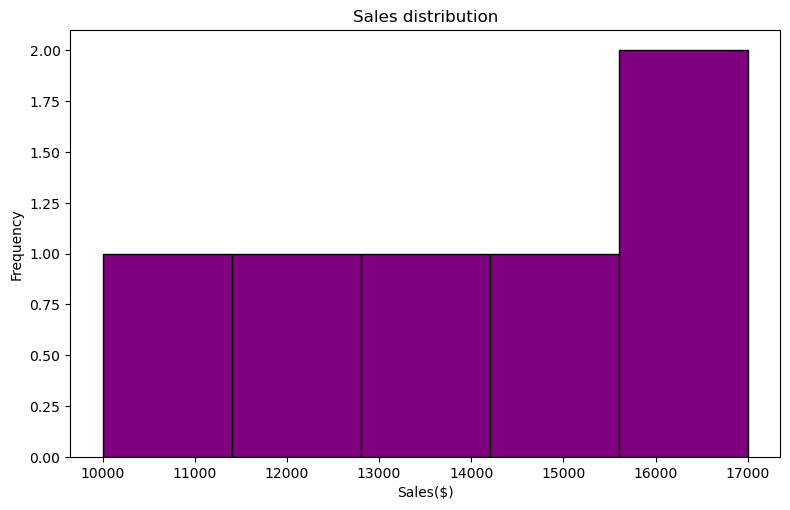

In [9]:
# Histogram : Distributions of sales
plt.figure(figsize=(8,5))
plt.hist(df['Sales'], bins=5,color='purple', edgecolor = 'black')
plt.xlabel('Sales($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.title('Sales distribution')
plt.show()
# A histogram showing the distribution of sales value accross months

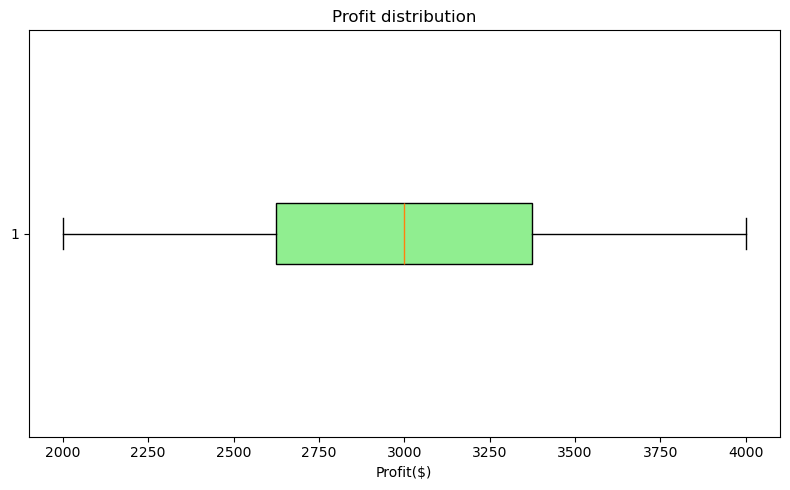

In [11]:
# Box plot: profit distribution
plt.figure(figsize=(8,5))
plt.boxplot(df['Profit'],vert=False, patch_artist=True, boxprops=dict(facecolor = 'lightgreen'))
plt.title('Profit distribution')
plt.xlabel('Profit($)')
plt.tight_layout()
plt.show()


===vert=False: This is a key parameter that tells the function to draw the box plot horizontally instead of the default vertical orientation.

===patch_artist=True: This allows the box to be filled with color.



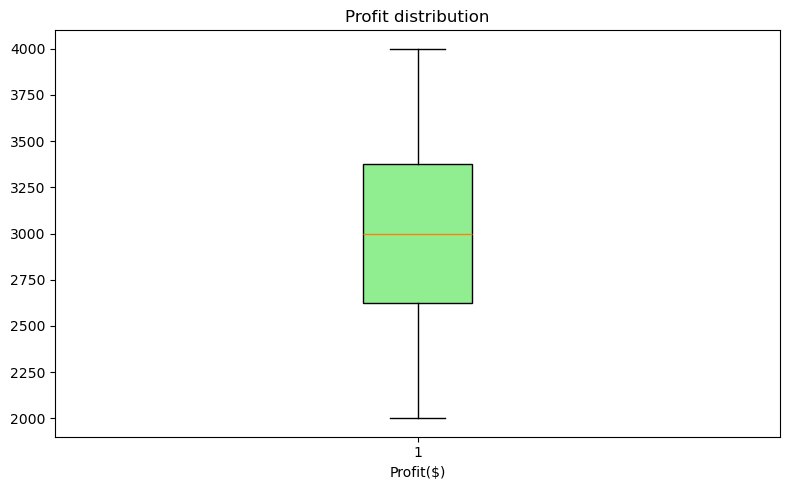

In [12]:
# Box plot: profit distribution
plt.figure(figsize=(8,5))
plt.boxplot(df['Profit'],vert=True, patch_artist=True, boxprops=dict(facecolor = 'lightgreen'))
plt.title('Profit distribution')
plt.xlabel('Profit($)')
plt.tight_layout()
plt.show()


In [14]:
pip install gradio


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
import gradio as gr
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    "Month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun"],
    "Sales": [10000, 12000, 15000, 13000, 17000, 16000],
    "Profit": [2000, 3000, 4000, 2500, 3500, 3000]
}
df = pd.DataFrame(data)

# Function to return selected plot
def generate_plot(plot_type):
    fig = plt.figure(figsize=(8, 5))

    if plot_type == "Line Plot":
        plt.plot(df['Month'], df['Sales'], color='blue', marker='o', label='Sales')
        plt.title('Sales Trend Over Months')
        plt.xlabel('Month')
        plt.ylabel('Sales ($)')
        plt.grid(True)
        plt.legend()

    elif plot_type == "Stacked Bar Chart":
        fig.set_size_inches(10, 6)
        width = 0.3
        plt.bar(df['Month'], df['Sales'], width=width, label='Sales', color='skyblue')
        plt.bar(df['Month'], df['Profit'], width=width, label='Profit', color='orange', bottom=df['Sales'])
        plt.title('Sales and Profit Comparison by Month')
        plt.xlabel('Month')
        plt.ylabel('Amount ($)')
        plt.legend()

    elif plot_type == "Pie Chart":
        fig.set_size_inches(7, 7)
        plt.pie(df['Profit'], labels=df['Month'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
        plt.title('Profit Distribution by Month')

    elif plot_type == "Scatter Plot":
        plt.scatter(df['Sales'], df['Profit'], color='green', s=100, edgecolors='black')
        plt.title('Sales vs Profit')
        plt.xlabel('Sales ($)')
        plt.ylabel('Profit ($)')
        plt.grid(True)

    elif plot_type == "Histogram":
        plt.hist(df['Sales'], bins=5, color='purple', edgecolor='black')
        plt.title('Sales Distribution')
        plt.xlabel('Sales ($)')
        plt.ylabel('Frequency')

    elif plot_type == "Box Plot":
        plt.boxplot(df['Profit'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
        plt.title('Profit Distribution')
        plt.xlabel('Profit ($)')

    plt.tight_layout()
    return fig

# Gradio UI
demo = gr.Interface(
    fn=generate_plot,
    inputs=gr.Radio(
        ["Line Plot", "Stacked Bar Chart", "Pie Chart", "Scatter Plot", "Histogram", "Box Plot"],
        label="Choose Plot Type"
    ),
    outputs=gr.Plot(label="Visualization"),
    title="Sales & Profit Visual Explorer",
    description="Choose a chart type to visualize the data."
)

demo.launch()


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
